In [2]:
import datetime

#
from collections import Counter

#
import collections

#
import pandas as pd

#
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cadastro = pd.read_csv('C:\\Users\\andsp\\Downloads\\Python\\Aula_3\\cadastro - cadastro.csv')
preco_gasolina = pd.read_csv('C:\\Users\\andsp\\Downloads\\Python\\Aula_3\\preco da gasolina - preco da gasolina.csv')
salario = pd.read_csv('C:\\Users\\andsp\\Downloads\\Python\\Aula_3\\salario_profissoes - salario_profissoes.csv')


In [4]:
cadastro['ano_atual'] = 2020

In [5]:
cadastro.head(1)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,ano_atual
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,2020


In [6]:
cadastro.shape

(30, 16)

In [7]:
cadastro.insert(loc=16,column="Idade", value = cadastro.ano_atual - cadastro.ano_nascimento)

In [8]:
#média da idade deas pessoas
cadastro_idade = cadastro['Idade']
cadastro_idade.mean()
print('média da idade geral é' , cadastro_idade.mean())

média da idade geral é 32.733333333333334


In [9]:
#Quantos homens tem no cadastro ?
#Quantas mulheres tem no cadastro ?
sex = {'f' : 'Fem' , 'm' : 'Masc'}
cadastro['sexo'] = cadastro['sexo'].map(sex)


In [10]:
#Quantidade de Homens
cadastro['sexo'].value_counts().Masc

16

In [11]:
#Quantidade de Mulheres
cadastro['sexo'].value_counts().Fem

14

In [12]:
cadastro['sexo'].value_counts()

Masc    16
Fem     14
Name: sexo, dtype: int64

In [13]:
#Qual a idade média dos homens e das mulheres ?
cadastro.groupby(by='sexo')['Idade'].mean()

sexo
Fem     33.857143
Masc    31.750000
Name: Idade, dtype: float64

In [14]:
cadastro.head(1)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,ano_atual,Idade
0,Dirceu,Manolo,1985,Masc,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,2020,35


In [15]:
#Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ?
#alterei a nomencçatura para deixae em formato padrão e contabilizei a qtd de cada valor.
import pandas as pd
cadastro = cadastro.replace(['ensino médio','ensino Médio'],'Ensino Médio')
cadastro = cadastro.replace("ensino superior","Ensino Superior")

In [16]:
import matplotlib.pyplot
graduacao = cadastro['escolaridade'].value_counts()

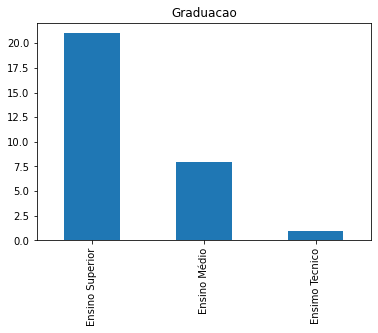

In [17]:
import matplotlib.pyplot

graduacao.plot(kind='bar', x = 'escolaridade',  title='Graduacao')

In [18]:
#Adicionei a coluna Pessoa para indicar a linha que deve ser considerada no calculo
import pandas as pd
salario['Por pessoa'] = '$ BRL'
salario.groupby(by='Por pessoa')['salario até 3 anos','salaior +3 anos'].mean()

<ipython-input-18-8a4d4f818cfe>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salario.groupby(by='Por pessoa')['salario até 3 anos','salaior +3 anos'].mean()


,salario até 3 anos,salaior +3 anos
Por pessoa,,
$ BRL,3791.304348,6417.391304


In [19]:
#check para saber se o mean esta correto, para saber a quantidade de valor para tirar a média, fiz um shape anterior
salario.shape

(23, 4)

In [20]:
salario.groupby(by='Por pessoa')['salario até 3 anos'].sum()/23 ,"                      ",salario.groupby(by='Por pessoa')['salaior +3 anos'].sum()/23

(Por pessoa
 $ BRL    3791.304348
 Name: salario até 3 anos, dtype: float64,
 '                      ',
 Por pessoa
 $ BRL    6417.391304
 Name: salaior +3 anos, dtype: float64)

In [21]:
#unificando as planilha para mostrar quem tem o maior salario
novo_df = cadastro.merge(salario, left_on='profissão', right_on='Profissões')

In [22]:
# para descobrir o maior salario ordenei por valor e coloquei 'ascending = false' para ser em ordem decrescente e coloquei head para ter apenas o maior valor
maior_salario = novo_df.sort_values(['salaior +3 anos',], ascending=[ False]).head(1)
print('Maior salario é', maior_salario['nome'])

Maior salario é 9    Mirtes
Name: nome, dtype: object


In [23]:
#Tirando desempregado quem recebe menos ?Não consegui filtrar o valor "desempregados" para nao aparecer.
menor = novo_df.groupby(by='profissão')['salaior +3 anos'].min()
menor

profissão
Analista de Sistemas       6500
Autonoma                   9000
Auxiliar de Enfermagem     4000
Biomedica                  5500
Caminhoneiro              12000
Cientista de Dados        14000
Comercio Exterior          4500
Dentista                  13000
Enfermeira                 7000
Frentista                  2300
Gerente Financeiro         9000
Gerente Geral              5500
Gerente de Projeto        10000
Médica                    20000
Nutricionista              7000
Pedreiro                   6000
Professora                 4500
Recursos Humanos           4000
caixa de mercado           1200
desempregado                  0
dona de casa               1200
estagiario                 1400
estudante                     0
Name: salaior +3 anos, dtype: int64

In [29]:
#gostam de caminhar no final de semana


NameError: name 'd1' is not defined

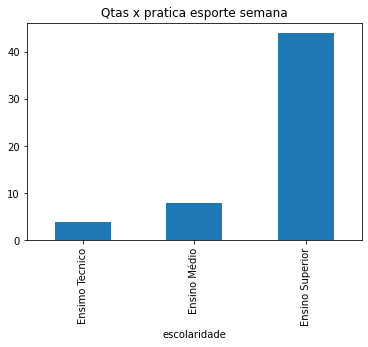

In [25]:
#Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte ?
#fiz um groupby somando a coluna de qwuem pratica esporte, assim temos uma ideia pela qtd de vezes que pratica esporte na semana
import pandas as pd

esporte = novo_df.groupby(by='escolaridade')['quanta_vezes_na_semana_pratica_esporte'].sum()
esporte.plot(kind='bar', title='Qtas x pratica esporte semana')


In [26]:
#Mostre de forma gráfica a distribuição de estados do cadastro ?
#Criri uma coluna com quantidade para ter a variavelq ue somase os casos que consta determinada cidade. 
import pandas as pd
novo_df['quantidade'] = 1
cidade = novo_df[['cidade', 'quantidade']].groupby('cidade').sum()

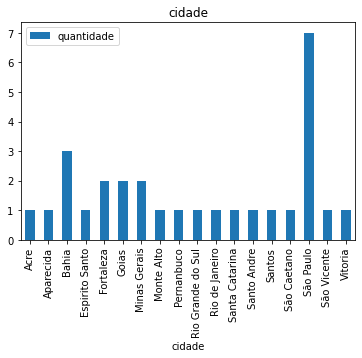

In [27]:
import matplotlib.pyplot as plt

import matplotlib.pyplot

cidade.plot(kind='bar', title='cidade')

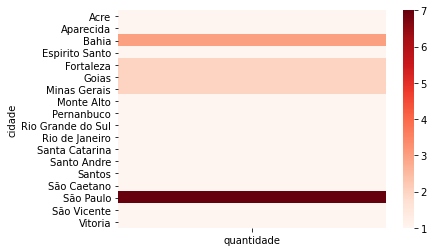

In [28]:
#Crie um mapa de calor ? Utilizeis os dados da distribuição da cidade e escolhei a cor vermelha para representar o mapa de calor.
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data = cidade, fmt ='d', cmap ='Reds')